In [47]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay

In [48]:
full_data = pd.read_csv("../data/processed/full_all_day_ahead.csv")
full_data.head()

cols_1_day_ahead = [c for c in full_data.columns if c == "Abnormal" or c.endswith("_1")]
data_1_day_ahead = full_data[cols_1_day_ahead]

data_1_day_ahead[data_1_day_ahead.isna().any(axis=1)]

,ACWO_1,ADMO_1,ADRR_1,CSO_1,DPB_1,DPH_1,HTB_1,HTH_1,ITP_1,OGO_1,PPL_1,PS_1,RRIR_1,RRR_1,RR_1,TAGI_1,TGA_1,TLRR_1,Abnormal
2450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [49]:
data_1_day_ahead_nadropped = data_1_day_ahead.dropna()

X_1da_nadrop = data_1_day_ahead_nadropped[[c for c in cols_1_day_ahead if c != "Abnormal"]]
y_1da_nadrop = data_1_day_ahead_nadropped["Abnormal"]

y_1da_nadrop.value_counts() / len(y_1da_nadrop)

Abnormal
False    0.986301
True     0.013699
Name: count, dtype: float64

In [50]:
X_scaler = StandardScaler()
X_scaler.fit(X_1da_nadrop)
X_scaled = X_scaler.transform(X_1da_nadrop)

In [51]:
y_encoder = LabelEncoder()
y_bin = y_encoder.fit_transform(y_1da_nadrop)
1-np.mean(y_bin)

0.9863013698630136

In [52]:
np.random.seed(123)

lr = LogisticRegressionCV(max_iter=250000, n_jobs=-1, class_weight="balanced", 
                          cv=10, scoring="f1", Cs=10, refit=True)

lr.fit(X_scaled, y_bin)

KeyboardInterrupt: 

In [40]:
lr.C_

array([0.35938137])

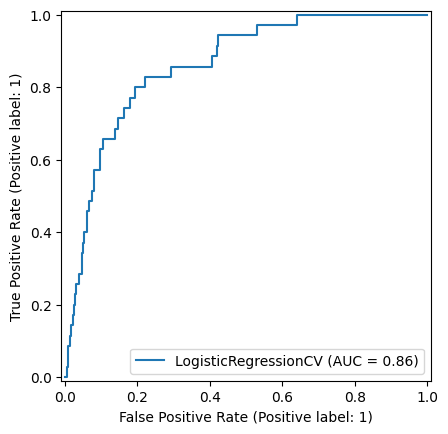

In [41]:
RocCurveDisplay.from_estimator(lr, X_scaled, y_bin)